# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
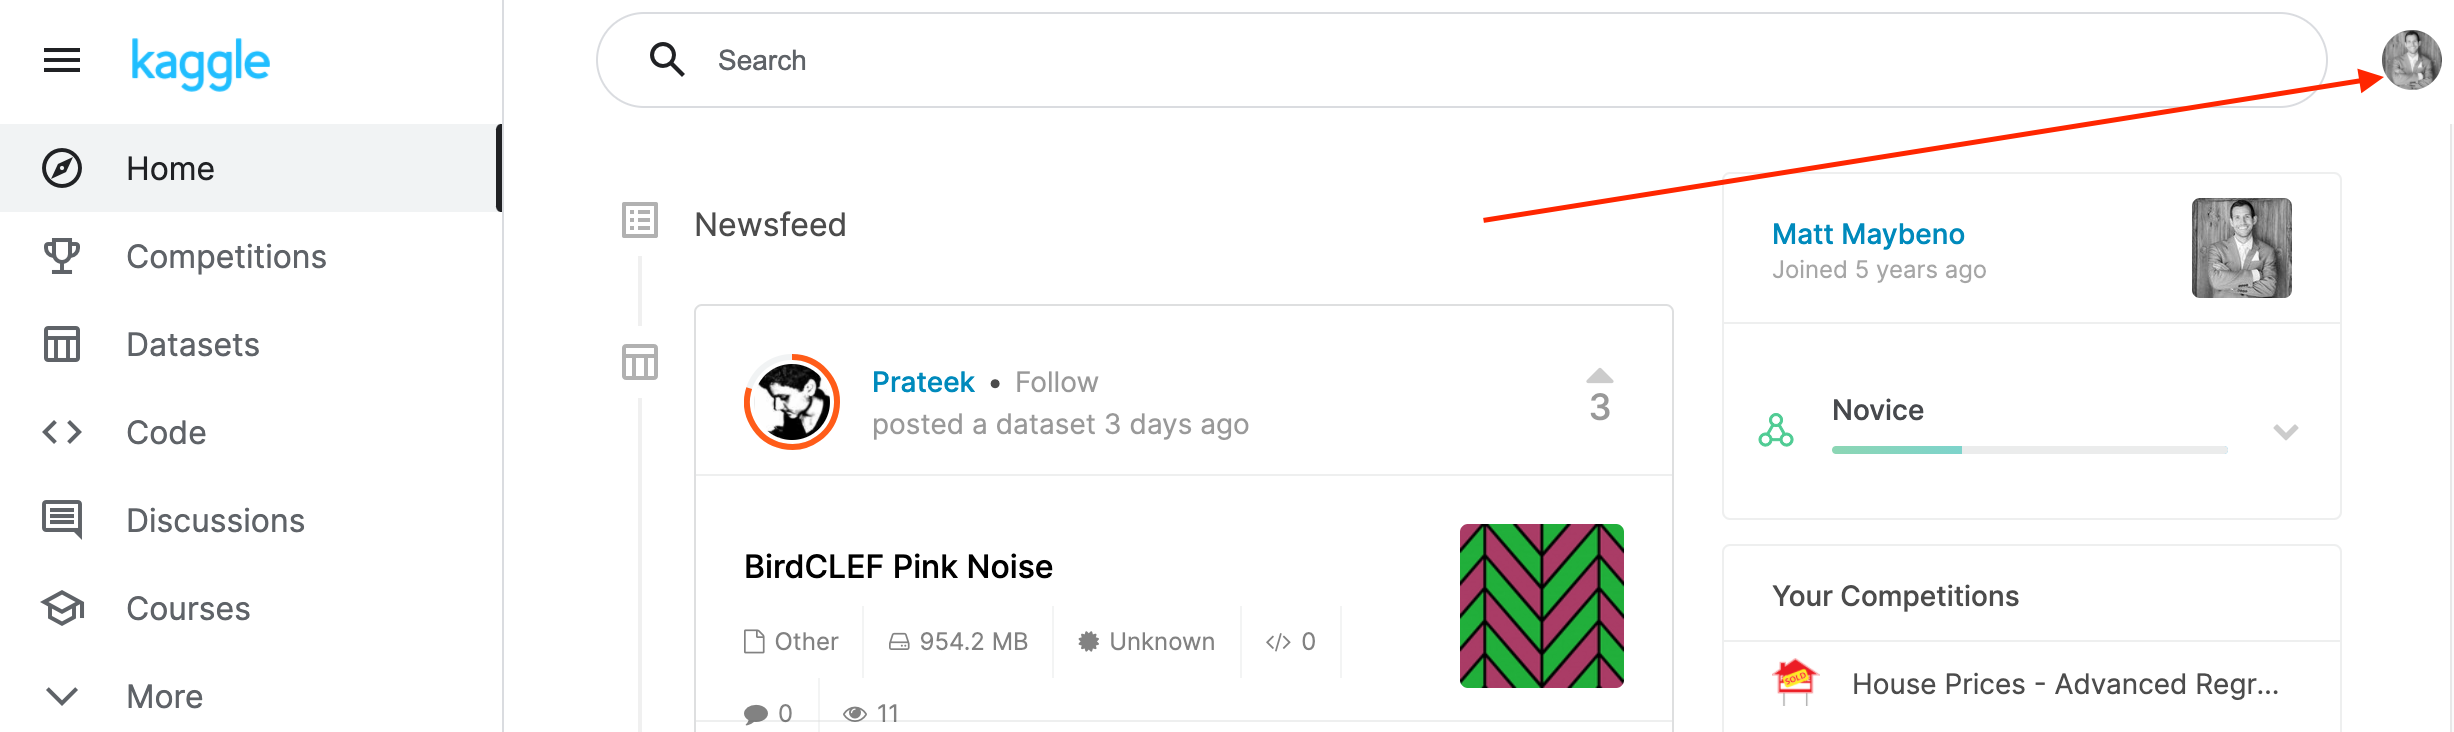
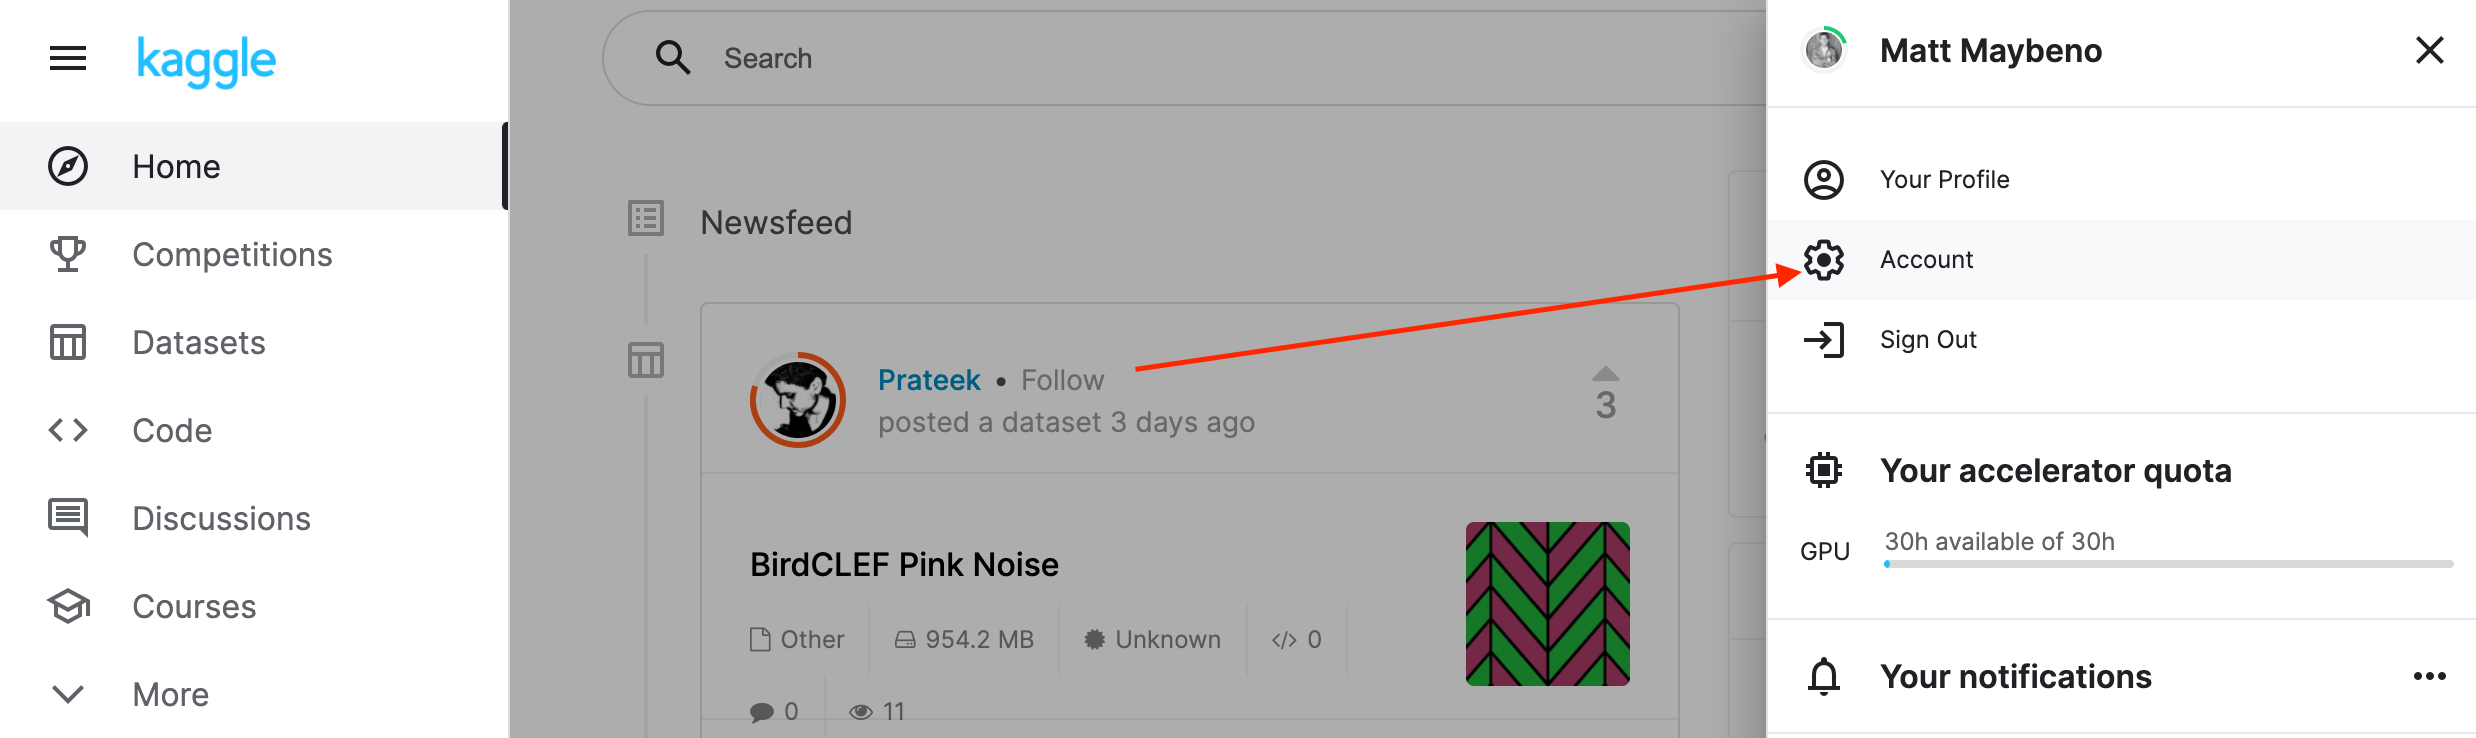
2. Scroll down to API and click Create New API Token.
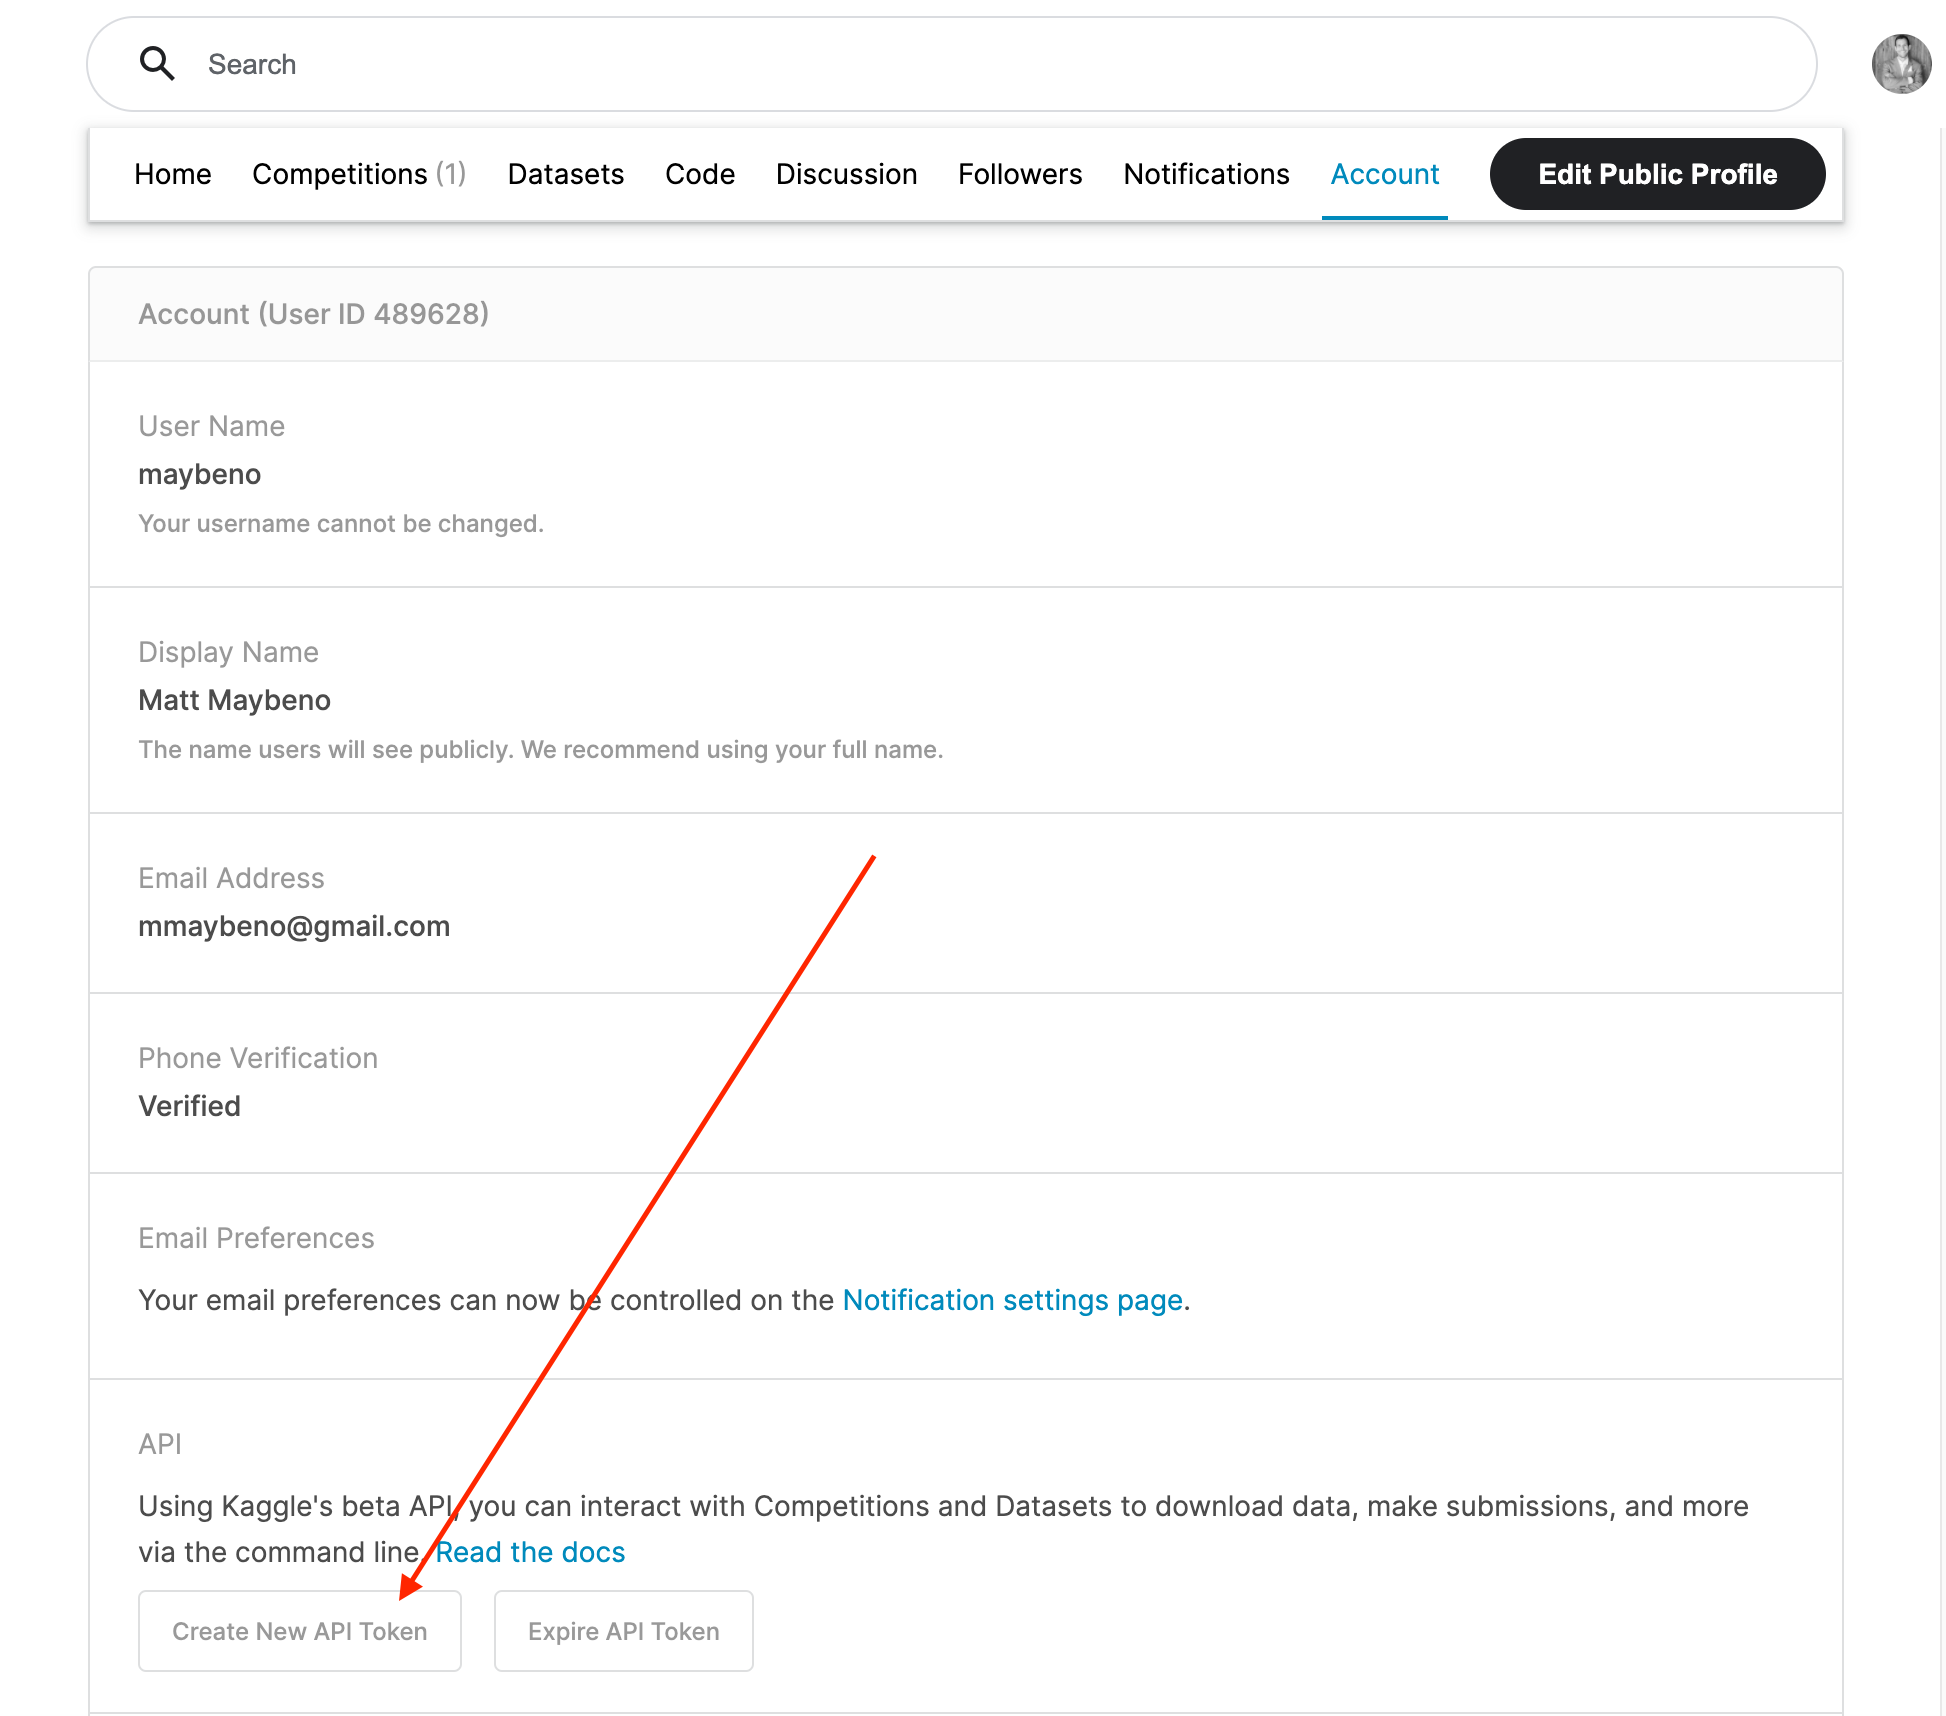
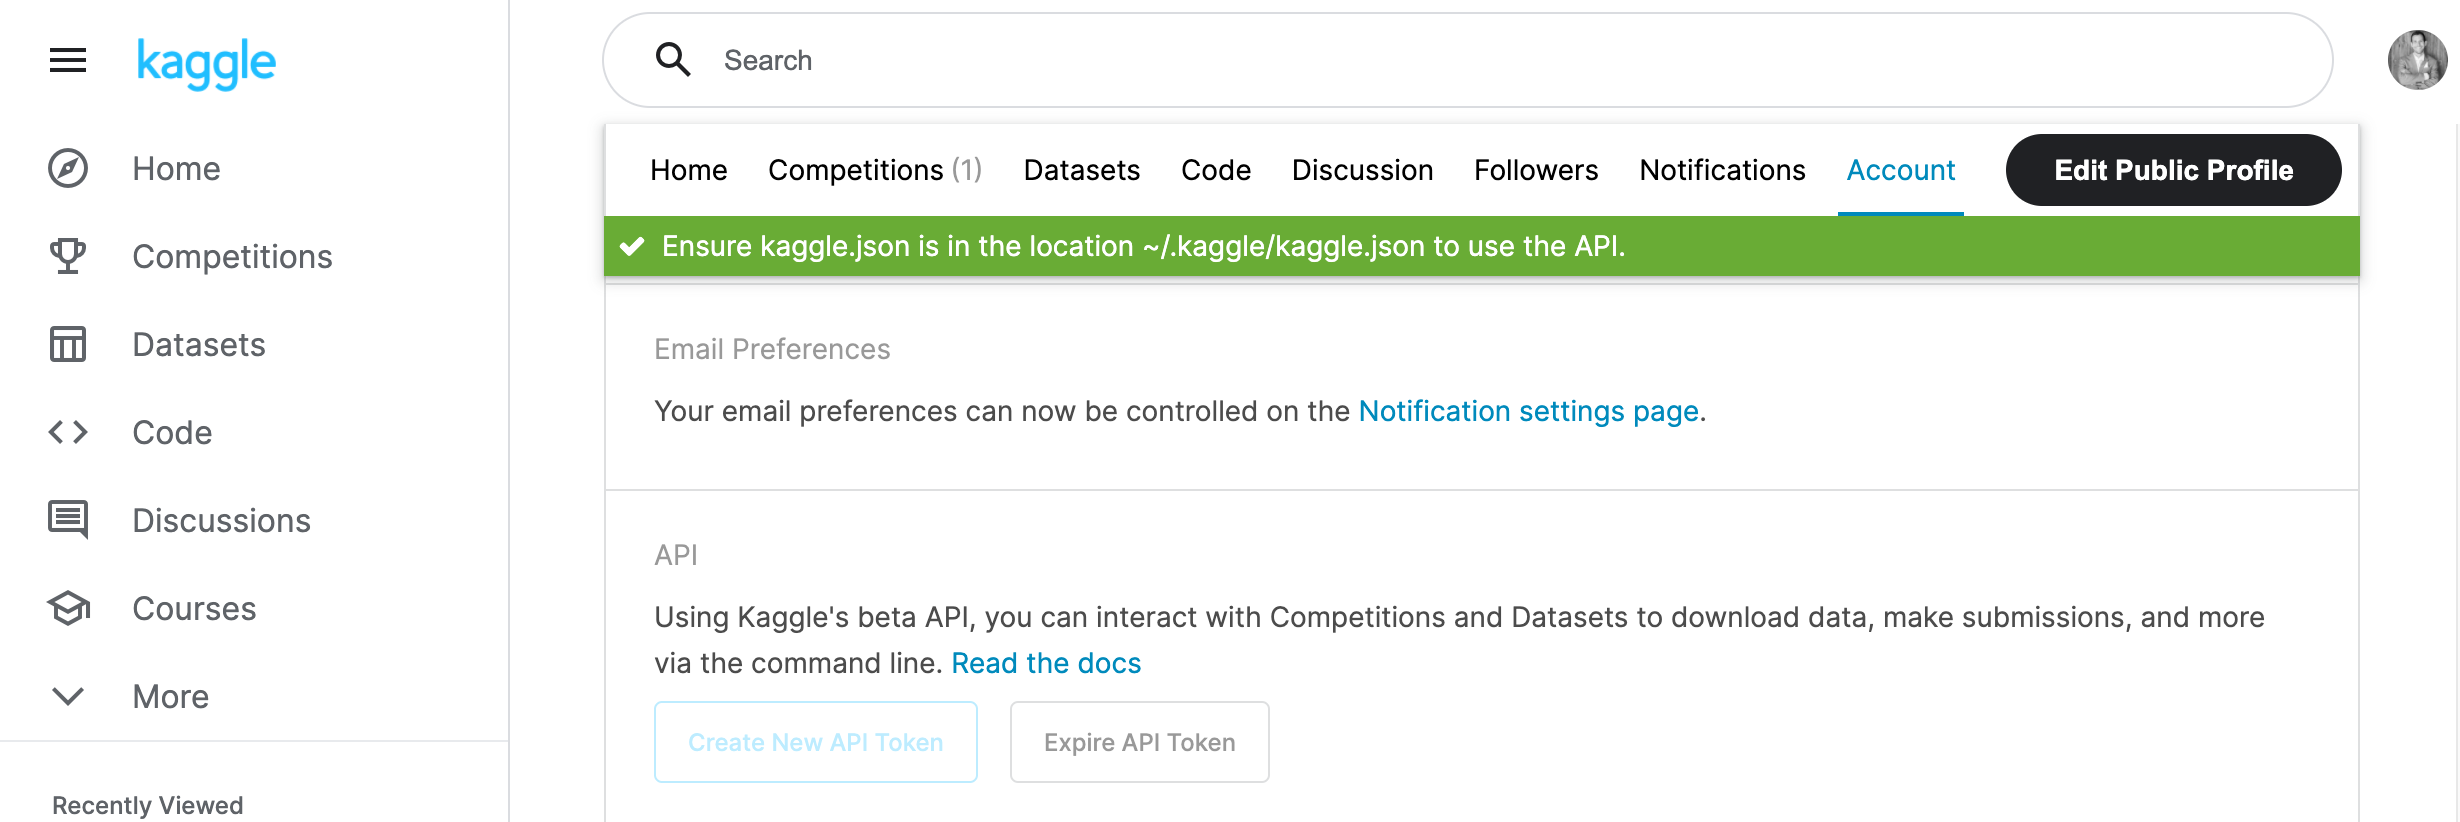
3. Open up `kaggle.json` and use the username and key.
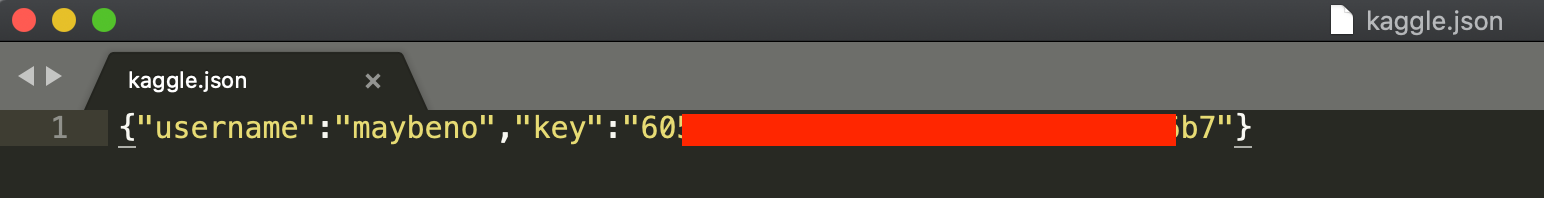

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip

In [2]:
!pip install -U setuptools wheel

In [3]:
!pip install -U "mxnet<2.0.0" bokeh==2.0.1

  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl.metadata (402 bytes)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [21 lines of output]
  C:\Users\steph\AppData\Local\Temp\pip-install-ltyypbuz\bokeh_852486f423de475f960dd434bf708cbc\versioneer.py:416: SyntaxWarning: invalid escape sequence '\s'
    LONG_VERSION_PY['git'] = '''
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\steph\AppData\Local\Temp\pip-install-ltyypbuz\bokeh_852486f423de475f960dd434bf708cbc\setup.py", line 118, in <module>
      version=get_version(),
              ^^^^^^^^^^^^^
    File "C:\Users\steph\AppData\Local\Temp\pip-install-ltyypbuz\bokeh_852486f423de475f960dd434bf708cbc\_setup_support.py", line 243, in get_version
      return versioneer.get_version()
             ^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\steph\AppData\Local\Temp\pip-install-ltyypbuz\bokeh_852486f423de475f960dd434bf708cbc\versioneer.py",

In [4]:
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [5]:
!pip install kaggle

In [6]:
#!pip install touch

In [95]:
# create the .kaggle directory and an empty kaggle.json file
#!mkdir -p /root/.kaggle
#!touch /root/.kaggle/kaggle.json
#!chmod 600 /root/.kaggle/kaggle.json

In [8]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
#kaggle_username = "stephanschuhmann"
#kaggle_key = "eae01bb1404cecc6d4a03964ebae9356"

# Save API token the kaggle.json file
#with open("/root/.kaggle/kaggle.json", "w") as f:
#    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
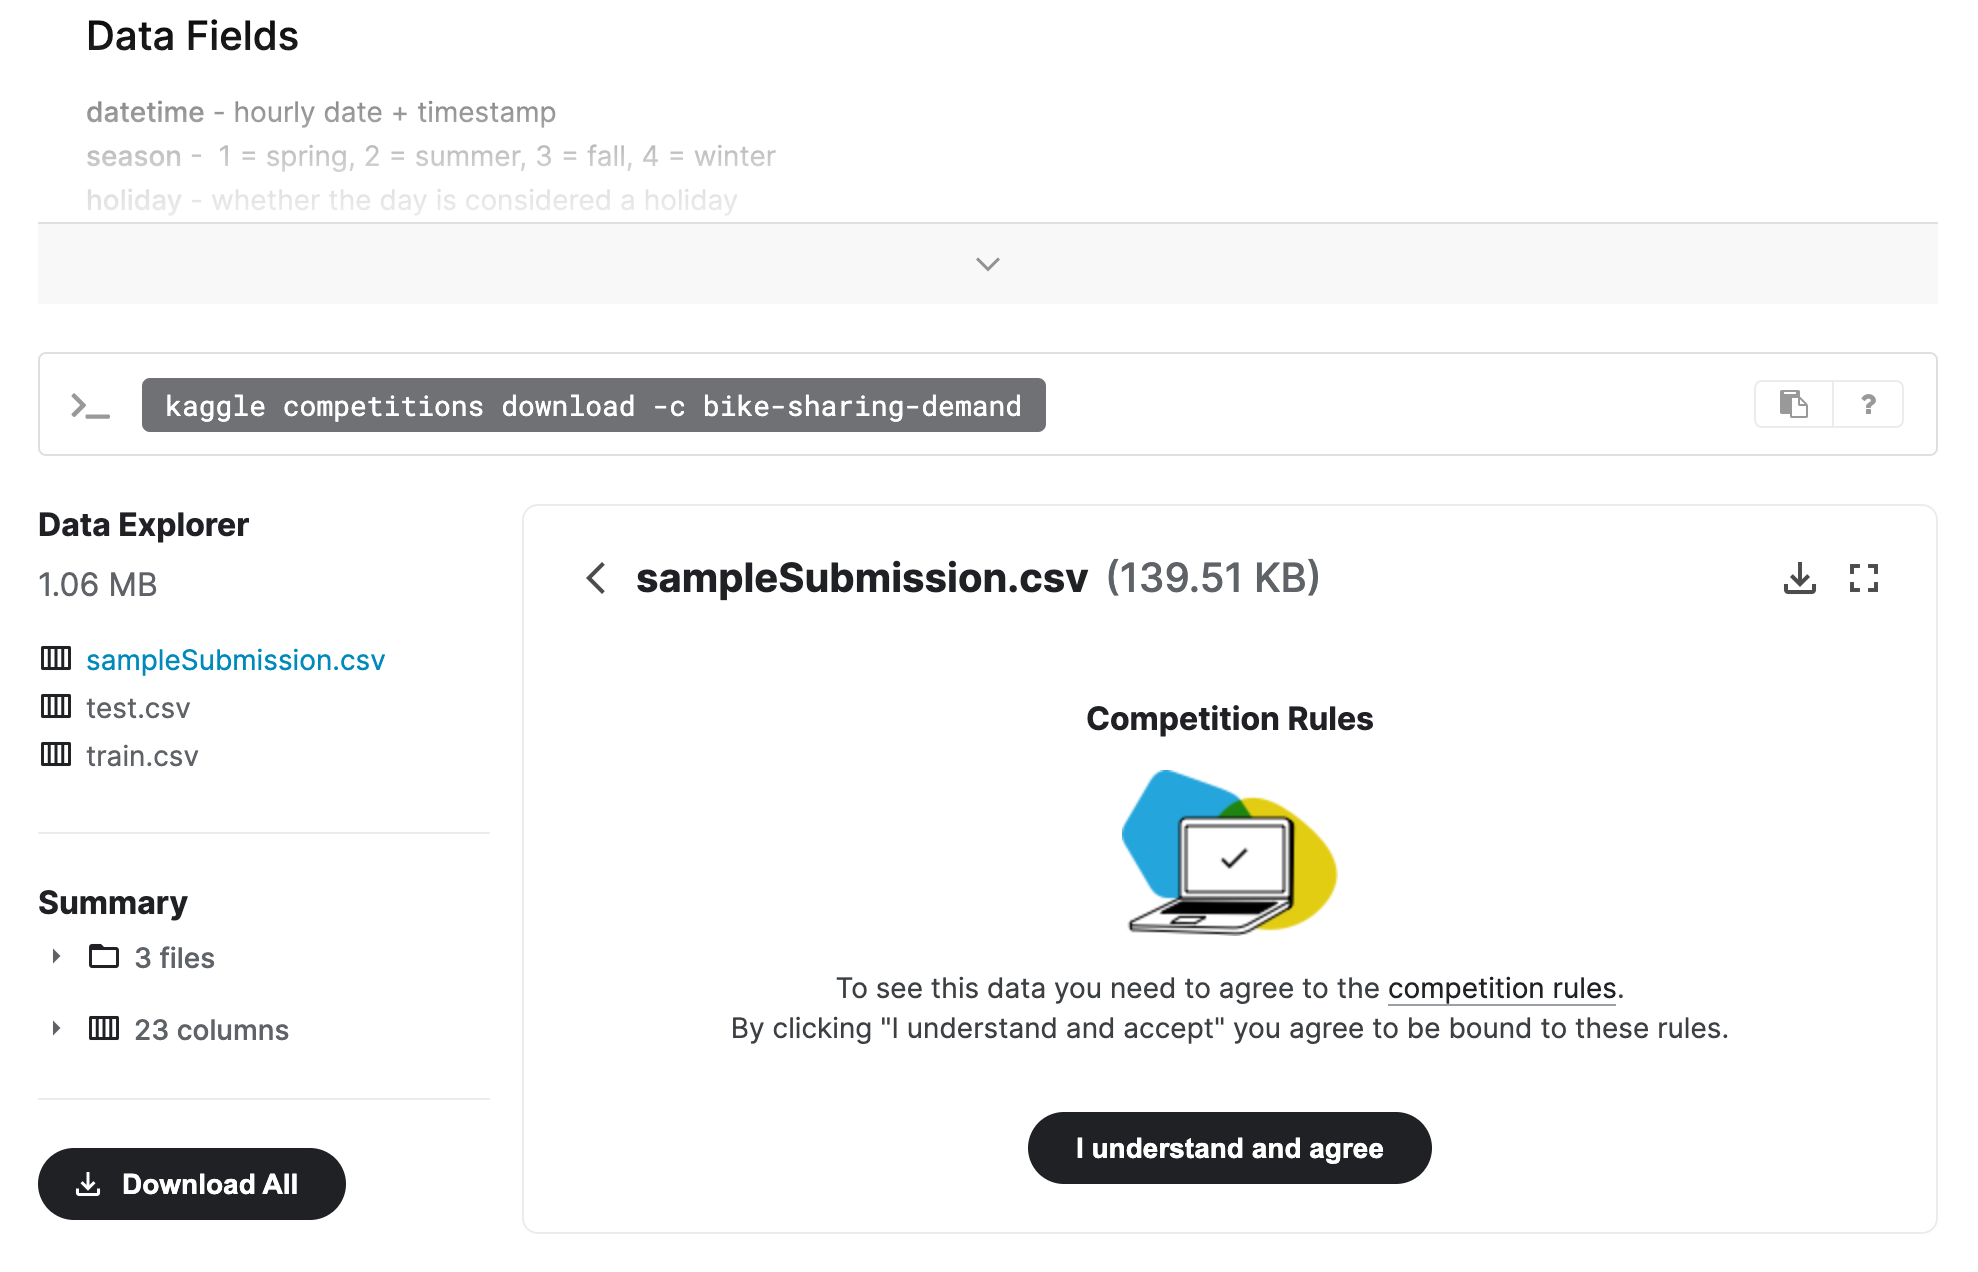

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
 #!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
#!unzip -o bike-sharing-demand.zip

In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [11]:
import csv

In [113]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('./bike-sharing-demand/train.csv',
                    parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [114]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [115]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('./bike-sharing-demand/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [117]:
# Same thing as train and test dataset
submission = pd.read_csv('./bike-sharing-demand/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [16]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600, #600sec = 10min
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20250418_055610"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.2
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       24.05 GB / 31.93 GB (75.3%)
Disk Space Avail:   379.21 GB / 929.98 GB (40.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

(_ray_fit pid=8964) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=8964) [8000]	valid_set's rmse: 135.261 [repeated 32x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_dystack pid=14280) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	8.2s	 = Training   runtime
(_dystack pid=14280) 	1.38s	 = Validation runtime
(_dystack pid=14280) Fitting model: LightGBM_BAG_L1 ... Training model for up to 84.59s of the 133.39s of remaining time.
(_dystack pid=14280) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.03%)


(_ray_fit pid=5208) [1000]	valid_set's rmse: 129.285 [repeated 5x across cluster]


(_dystack pid=14280) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	2.06s	 = Training   runtime
(_dystack pid=14280) 	0.3s	 = Validation runtime
(_dystack pid=14280) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 80.18s of the 128.98s of remaining time.
(_dystack pid=14280) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	1.23s	 = Training   runtime
(_dystack pid=14280) 	0.42s	 = Validation runtime
(_dystack pid=14280) Fitting model: CatBoost_BAG_L1 ... Training model for up to 78.34s of the 127.14s of remaining time.
(_dystack pid=14280) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.05%)
(_ray_fit pid=18888) 	Ran out of time, early stopping on iteration 9900.
(_dystack pid=14280) 	-131.5393	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	62.91s	 = Training   runtime
(_dystack pid=14280) 	0.02s	 

(_ray_fit pid=3420) [1000]	valid_set's rmse: 76.9467 [repeated 7x across cluster]


(_dystack pid=14280) 	-73.2022	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	2.91s	 = Training   runtime
(_dystack pid=14280) 	0.47s	 = Validation runtime
(_dystack pid=14280) Fitting model: LightGBM_BAG_L2 ... Training model for up to 40.52s of the 40.47s of remaining time.
(_dystack pid=14280) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.05%)
(_dystack pid=14280) 	-67.7522	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	1.1s	 = Training   runtime
(_dystack pid=14280) 	0.05s	 = Validation runtime
(_dystack pid=14280) Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 37.25s of the 37.21s of remaining time.
(_dystack pid=14280) 	-66.4907	 = Validation score   (-root_mean_squared_error)
(_dystack pid=14280) 	3.08s	 = Training   runtime
(_dystack pid=14280) 	0.43s	 = Validation runtime
(_dystack pid=14280) Fitting model: CatBoost_BAG_L2 ... Tr

### Review AutoGluon's training run with ranking of models that did the best.

In [17]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3  -50.729553  root_mean_squared_error       4.671595  370.759928                0.000000           0.034802            3       True         25
1      NeuralNetFastAI_BAG_L2  -52.067880  root_mean_squared_error       3.620731  297.881371                0.172661          21.444456            2       True         20
2      RandomForestMSE_BAG_L2  -53.365112  root_mean_squared_error       3.890976  281.508736                0.442906           5.071821            2       True         17
3        ExtraTreesMSE_BAG_L2  -54.016891  root_mean_squared_error       3.895306  277.807095                0.447236           1.370180            2       True         19
4             LightGBM_BAG_L2  -55.007305  root_mean_squared_error       3.527

C:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'Sta

<Axes: xlabel='model'>

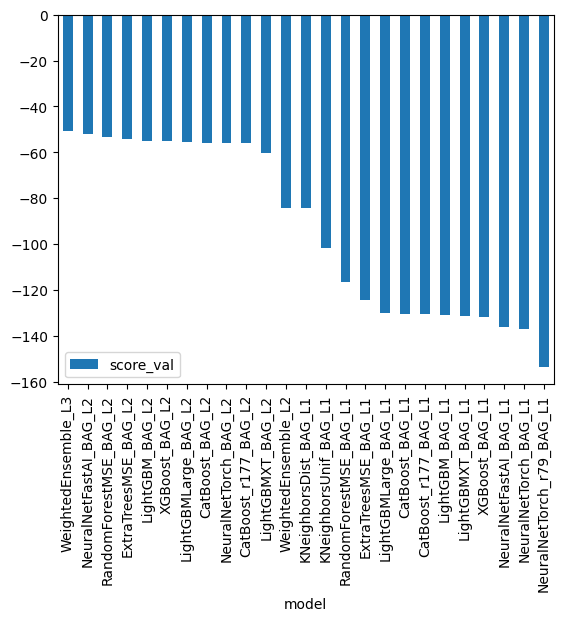

In [18]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [40]:
import warnings
warnings.filterwarnings('ignore')

predictions = predictor.predict(test)
predictions.head()

0    24.771128
1    42.421867
2    46.973942
3    48.362137
4    50.690090
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [41]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.317123
std        88.397064
min         1.624192
25%        22.454613
50%        67.645203
75%       167.535019
max       349.117279
Name: count, dtype: float64

In [42]:
##### How many negative values do we have?
predictions.lt(0).sum()

0

In [47]:
# Set them to zero
import numpy as np
predictions = np.where(predictions>0, predictions, 0)
predictions

array([ 24.771128,  42.421867,  46.97394 , ..., 159.17842 , 148.74155 ,
       149.47105 ], dtype=float32)

### Set predictions to submission dataframe, save, and submit

In [48]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [49]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  8%|8         | 16.0k/195k [00:00<00:03, 55.6kB/s]
100%|##########| 195k/195k [00:01<00:00, 188kB/s]  


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [58]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-04-18 06:17:55.843000  first raw submission  SubmissionStatus.COMPLETE  1.78377      1.78377       


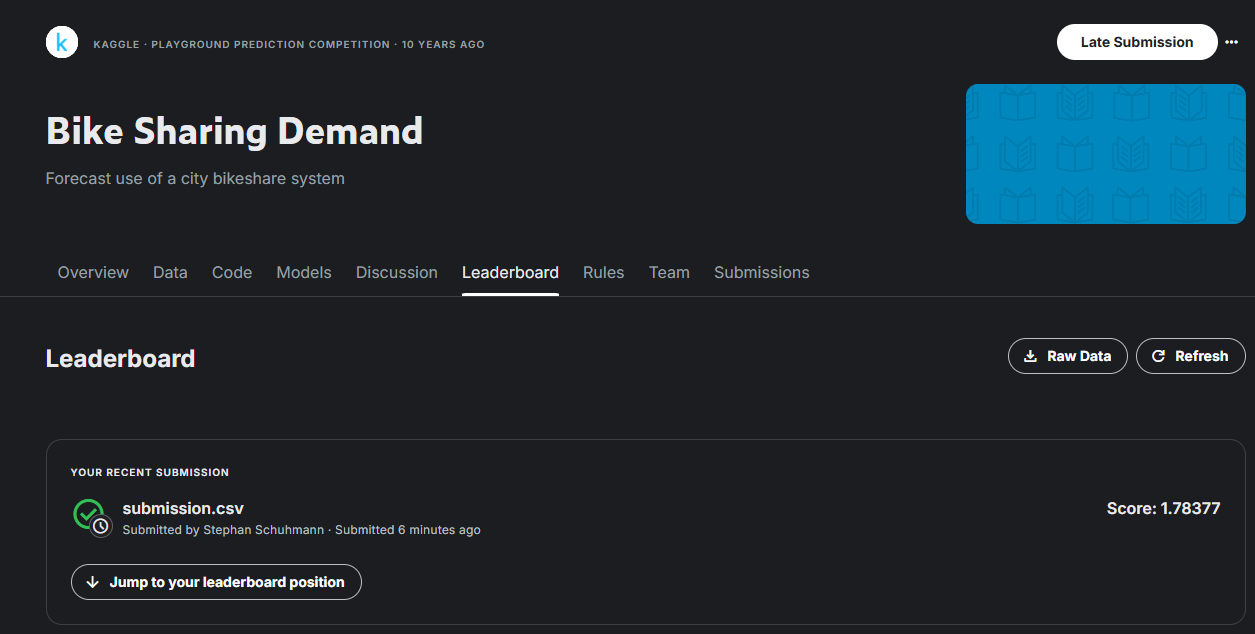

In [63]:
from IPython.display import Image, display

display(Image(filename='./images/submiss-1.png', width=600))

#### Initial score of `1.78377` (would be rank 3167/3242 in leaderboard; however, not shown since competition already finished)

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

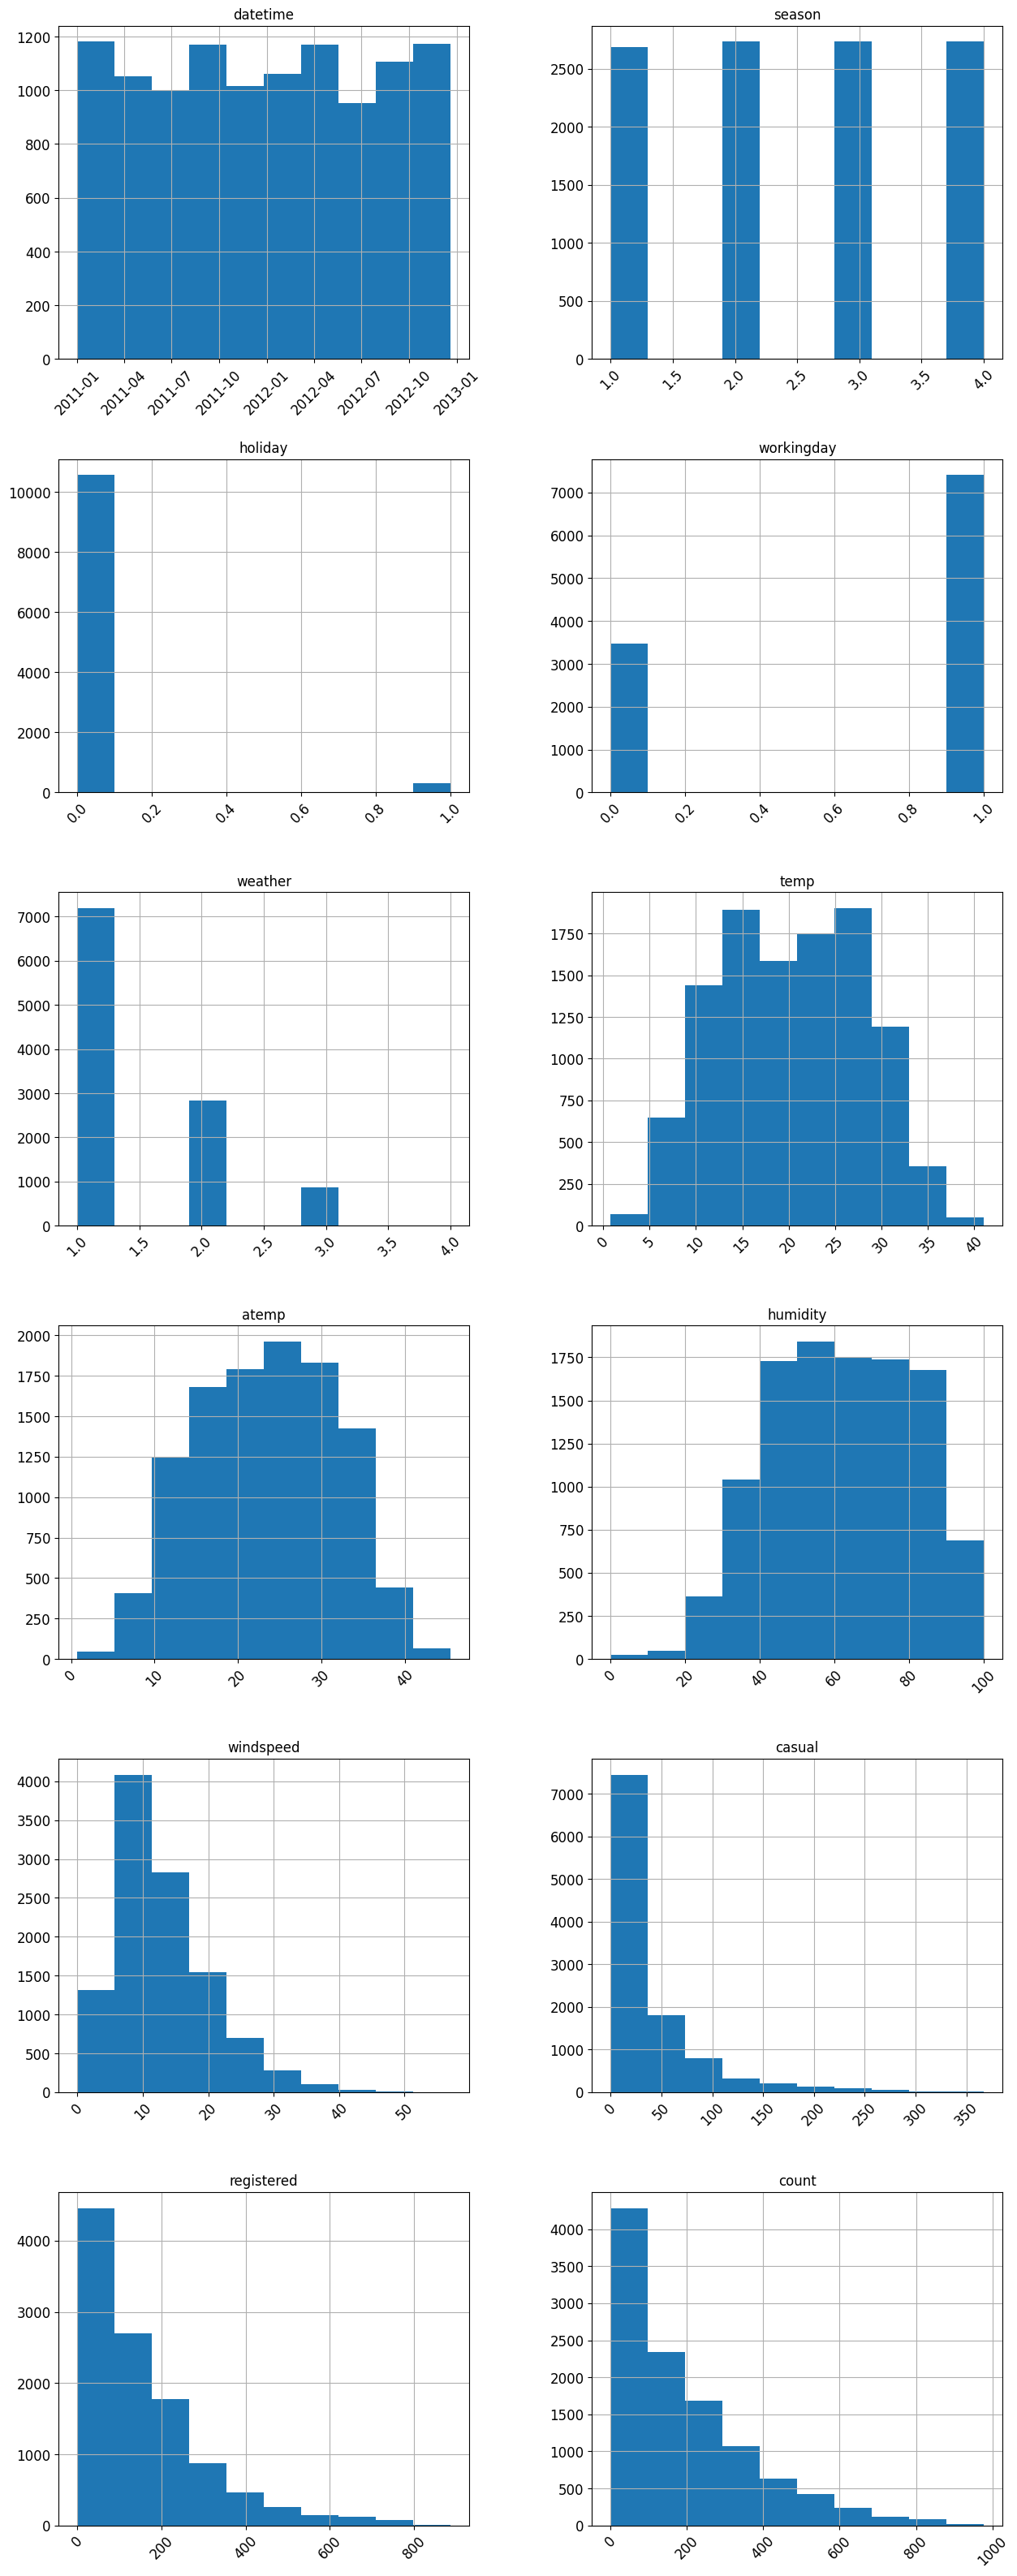

In [118]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(xlabelsize=12, ylabelsize=12, xrot=45, layout=(6, 2), figsize=(15, 40)) #, figsize=(10, 8), layout=(200, 200)

In [169]:
# create a new feature
train["hour"] = train['datetime'].dt.time.astype("string").str.slice(0, 2).astype("int64")
test["hour"] = test['datetime'].dt.time.astype("string").str.slice(0, 2).astype("int64")

In [171]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [172]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [173]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

print("Train:\n",train.dtypes)
print("\nTest:\n",test.dtypes)

Train:
 datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
hour                   int64
dtype: object

Test:
 datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
hour                   int64
dtype: object


In [174]:
# View our new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(7)
memory usage: 957.3 KB


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

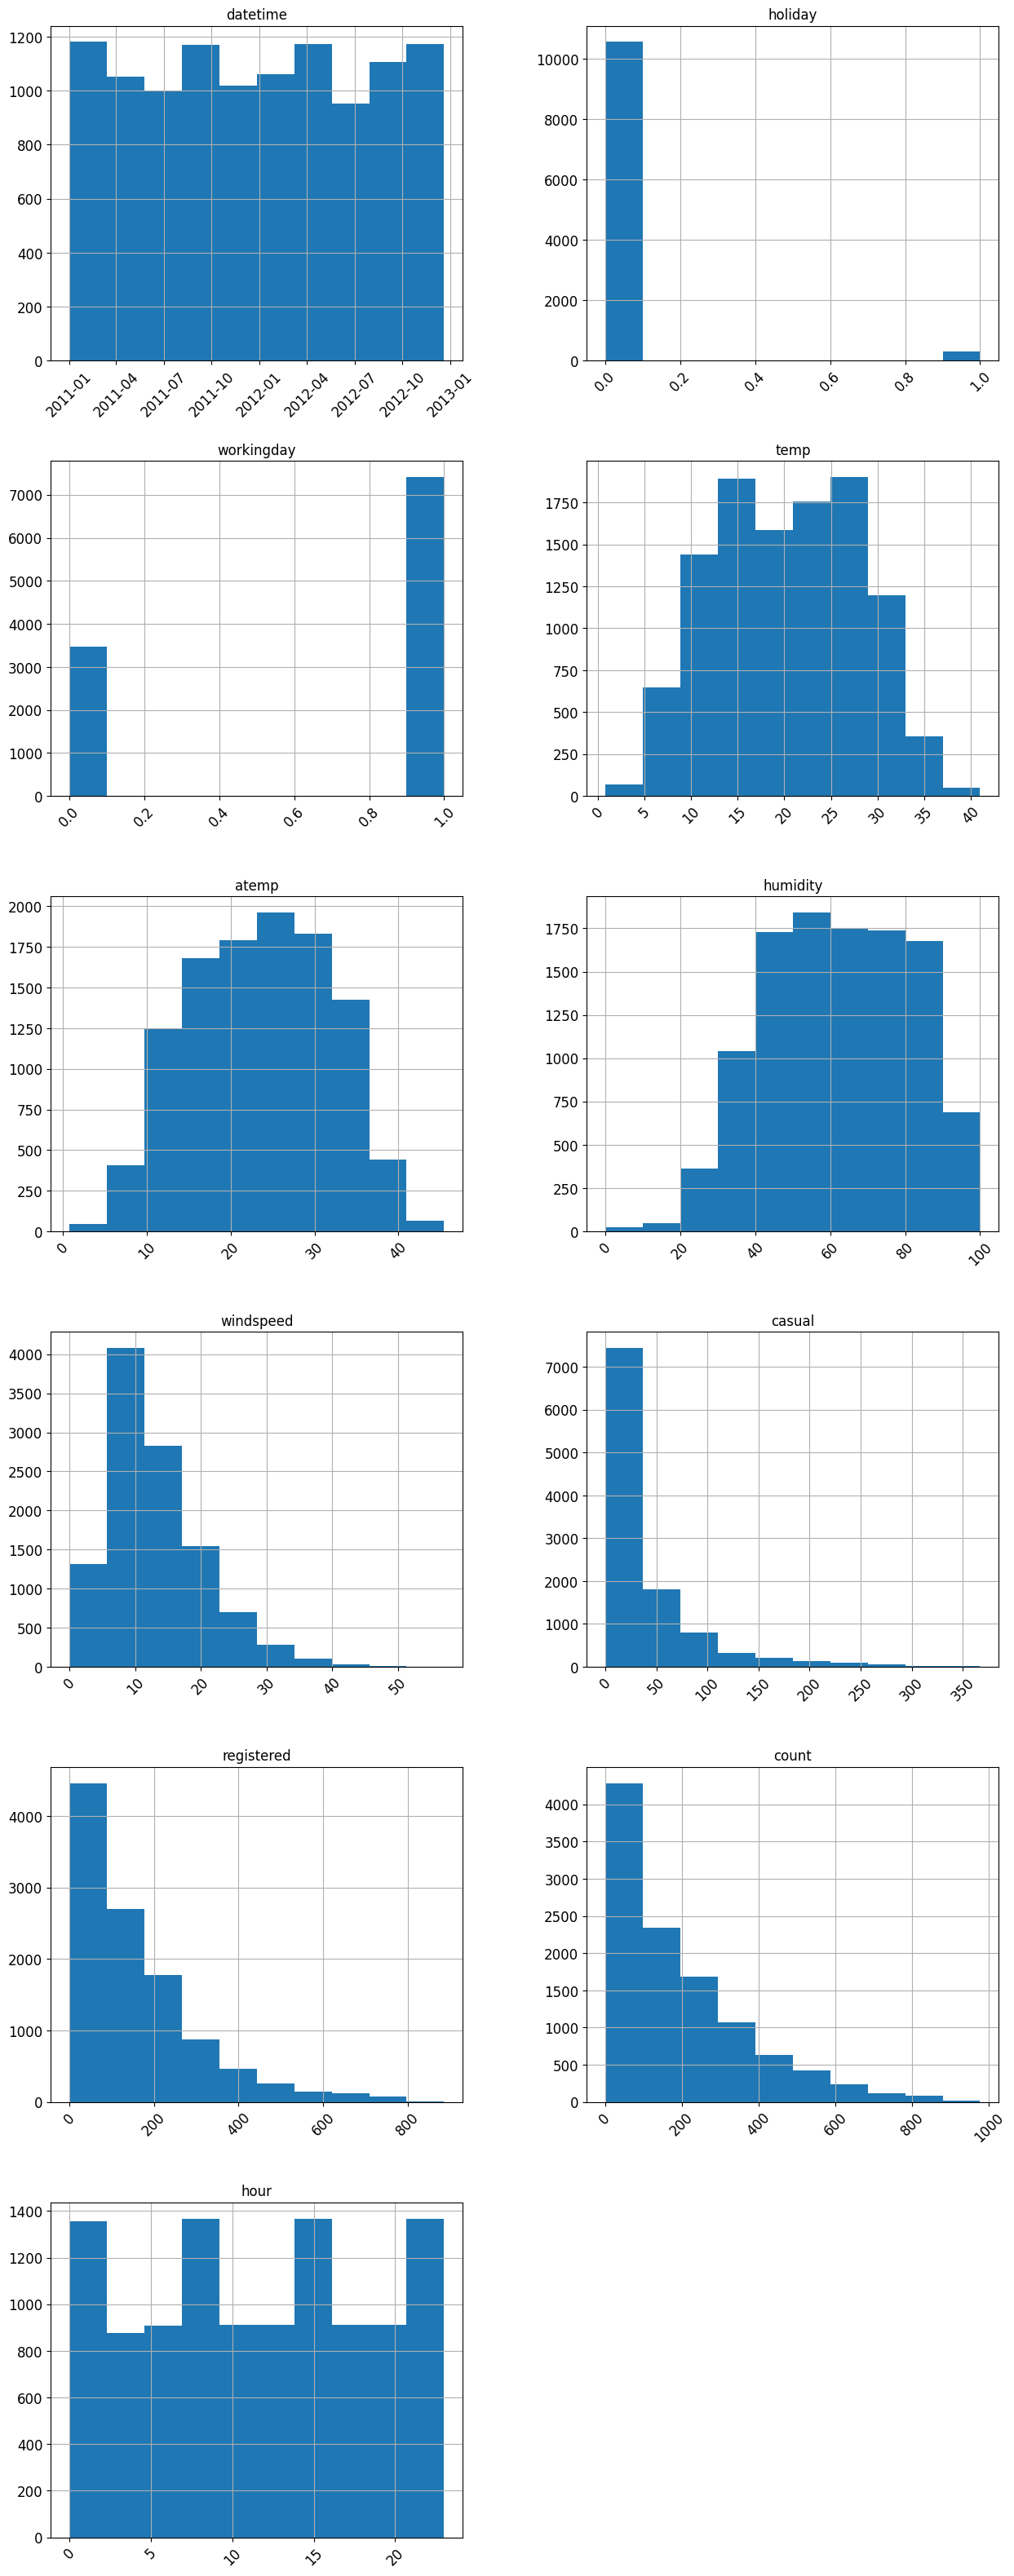

In [178]:
# View histogram of all features again now with the hour feature
train.hist(xlabelsize=12, ylabelsize=12, xrot=45, layout=(6, 2), figsize=(15, 40))

array([[<Axes: title={'center': 'hour'}>]], dtype=object)

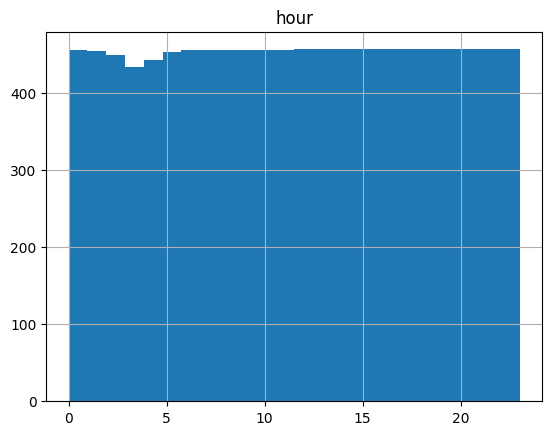

In [181]:
# Show only new feature "hour":
train.hist(column="hour", bins=24)

## Step 5: Rerun the model with the same settings as before, just with more features

In [182]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=600, #600sec = 10min
    presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20250418_080301"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.2
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       20.97 GB / 31.93 GB (65.7%)
Disk Space Avail:   377.70 GB / 929.98 GB (40.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

In [183]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.128222  root_mean_squared_error       5.127830  369.306540                0.001001           0.045841            3       True         20
1   NeuralNetFastAI_BAG_L2  -29.357864  root_mean_squared_error       5.024824  296.071631                0.182937          19.017905            2       True         17
2          LightGBM_BAG_L2  -30.374913  root_mean_squared_error       4.914546  278.077734                0.072659           1.024009            2       True         13
3          CatBoost_BAG_L2  -30.517331  root_mean_squared_error       4.871234  349.218786                0.029347          72.165060            2       True         15
4           XGBoost_BAG_L2  -30.948680  root_mean_squared_error       4.911340  279.362048   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleMode

<Axes: xlabel='model'>

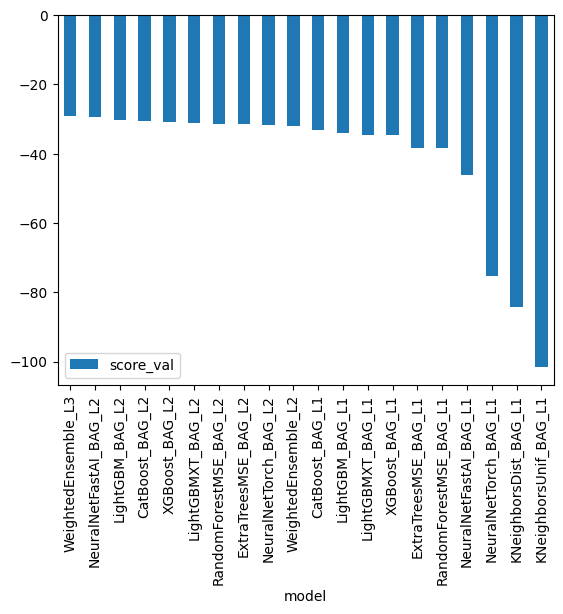

In [184]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [197]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    14.511646
1     9.672911
2     9.347576
3     9.138608
4     9.346111
Name: count, dtype: float32

In [198]:
predictions_new_features.describe()

count    6493.000000
mean      140.123367
std       113.065025
min         1.438341
25%        53.439732
50%       116.683594
75%       190.815979
max       761.392151
Name: count, dtype: float64

In [199]:
predictions_new_features.lt(0).sum()

0

In [200]:
if (predictions_new_features.lt(0).sum() > 0):
    predictions_new_features = np.where(predictions_new_features>0, predictions_new_features, 0)
predictions_new_features

0        14.511646
1         9.672911
2         9.347576
3         9.138608
4         9.346111
           ...    
6488    271.577759
6489    204.108612
6490    160.039597
6491    118.147079
6492     83.732849
Name: count, Length: 6493, dtype: float32

In [203]:
# Same submitting predictions
submission_new_features = pd.read_csv('./bike-sharing-demand/sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [204]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

Successfully submitted to Bike Sharing Demand


  0%|          | 0.00/195k [00:00<?, ?B/s]
  8%|8         | 16.0k/195k [00:00<00:03, 55.7kB/s]
100%|##########| 195k/195k [00:01<00:00, 186kB/s]  


In [206]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-04-18 08:21:57.917000  new features          SubmissionStatus.COMPLETE  0.74862      0.74862       
submission.csv               2025-04-18 06:17:55.843000  first raw submission  SubmissionStatus.COMPLETE  1.78377      1.78377       


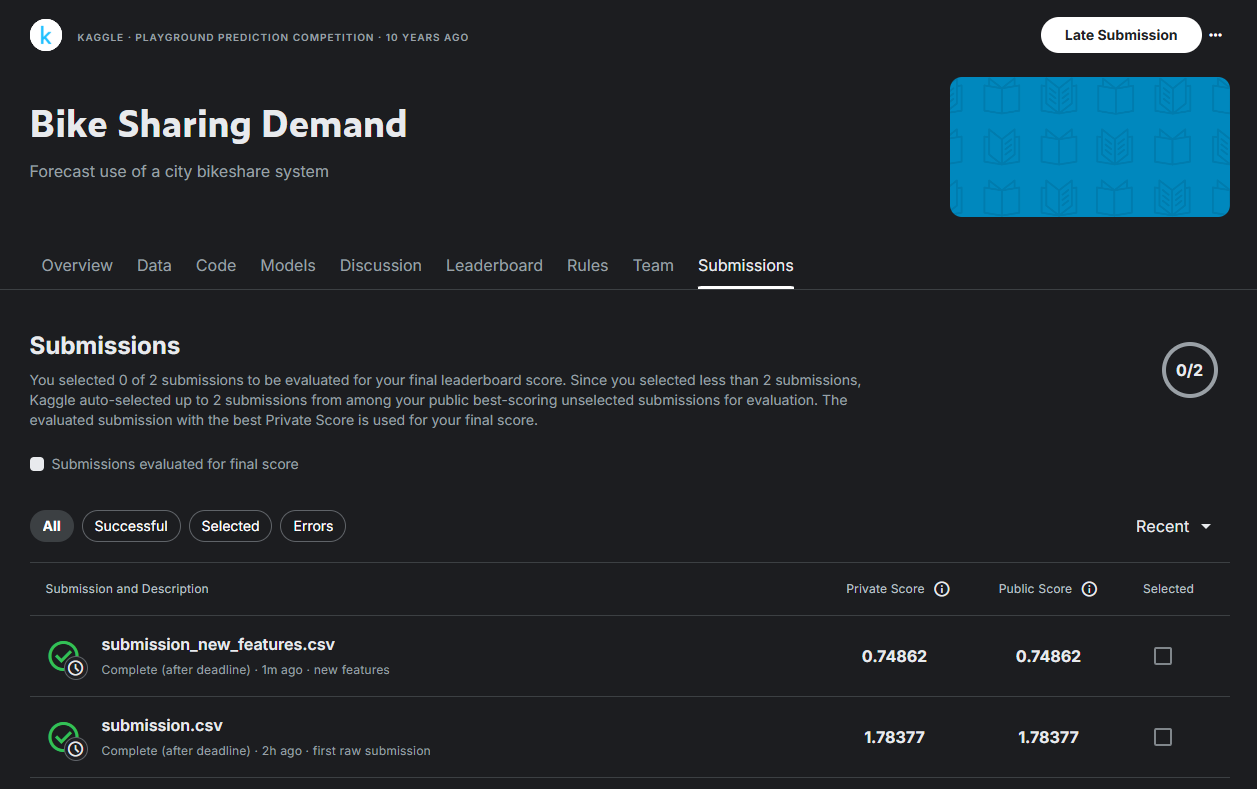

In [207]:
display(Image(filename='./images/submiss-2.png', width=600))

#### New Score of `0.74862` (would be rank 2587/3242 in leaderboard; however, not shown since competition already finished)

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [208]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["casual", "registered"]),
    time_limit=1800, #1800sec = 30min - increased training time!
    presets="best_quality",
    hyperparameter_tune_kwargs='auto')

2025-04-18 11:05:04,645	INFO timeout.py:54 -- Reached timeout of 2.5988380213953417 seconds. Stopping all trials.
2025-04-18 11:05:04,666	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'C:/Users/steph/Coding/AWS ML Eng/Project1-PredictBikeShares/AutogluonModels/ag-20250418_083142/models/NeuralNetTorch_r89_BAG_L2' in 0.0203s.
2025-04-18 11:05:06,745	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 2 trial(s):
- 94b0cfc2: FileNotFoundError('Could not fetch metrics for 94b0cfc2: both result.json and progress.csv were not found at C:/Users/steph/Coding/AWS ML Eng/Project1-PredictBikeShares/AutogluonModels/ag-20250418_083142/models/NeuralNetTorch_r89_BAG_L2/94b0cfc2')
- 8caaff63: FileNotFoundError('Could not fetch metrics for 8caaff63: both result.json and progress.csv were not found at C:/Users/steph/Coding/AWS ML Eng/Project1-PredictBikeShares/AutogluonModels/ag-20250418_083142/models/NeuralNetTorch_r89_BAG_L2/8caaff63')
No model

In [209]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                           model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L3  -30.324222  root_mean_squared_error      11.191617  176.057914                0.000000           0.078499            3       True        172
1            LightGBM_r94_BAG_L2  -30.800685  root_mean_squared_error      10.342875  141.419810                0.542329           4.458737            2       True        134
2            LightGBM_r15_BAG_L2  -30.821490  root_mean_squared_error      10.008185  141.010038                0.207640           4.048965            2       True        125
3           LightGBM_r131_BAG_L2  -30.830737  root_mean_squared_error      10.040272  141.354901                0.239726           4.393828            2       True         96
4            LightGBM_r96_BAG_L2  -30.839888  root_mean_squared

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1\\T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1\\T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel_LGB',
  'XGBoost_r33_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'ExtraTrees_r42_BAG_L1': 'StackerEnsembleModel_XT',
  'CatBoost_r137_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_r102_BA

<Axes: xlabel='model'>

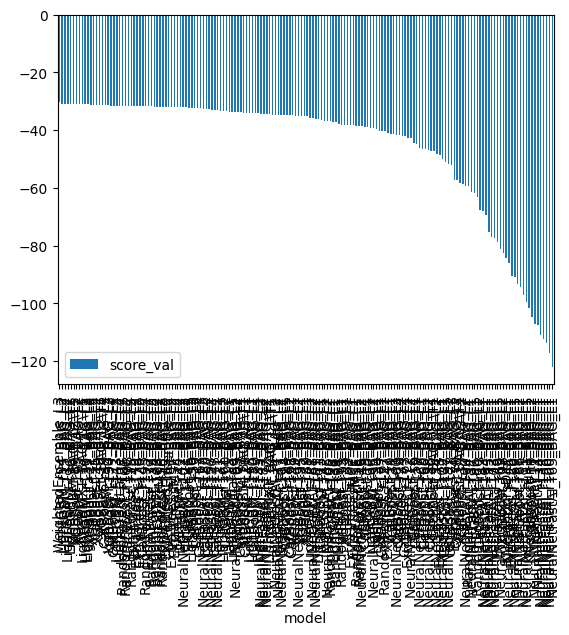

In [210]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [211]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
if (predictions_new_hpo.lt(0).sum() > 0):
    predictions_new_hpo = np.where(predictions_new_hpo>0, predictions_new_hpo, 0)
predictions_new_hpo

0        15.377746
1         9.605826
2         8.701822
3         7.448472
4         6.548375
           ...    
6488    309.138336
6489    203.767258
6490    147.151123
6491    104.594116
6492     75.305237
Name: count, Length: 6493, dtype: float32

In [212]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('./bike-sharing-demand/sampleSubmission.csv', parse_dates=['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [213]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  8%|8         | 16.0k/195k [00:00<00:03, 54.6kB/s]
100%|##########| 195k/195k [00:01<00:00, 187kB/s]  


In [214]:
!kaggle competitions submissions -c bike-sharing-demand 
#| tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-04-18 09:11:10.840000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.64080      0.64080       
submission_new_features.csv  2025-04-18 08:21:57.917000  new features                       SubmissionStatus.COMPLETE  0.74862      0.74862       
submission.csv               2025-04-18 06:17:55.843000  first raw submission               SubmissionStatus.COMPLETE  1.78377      1.78377       


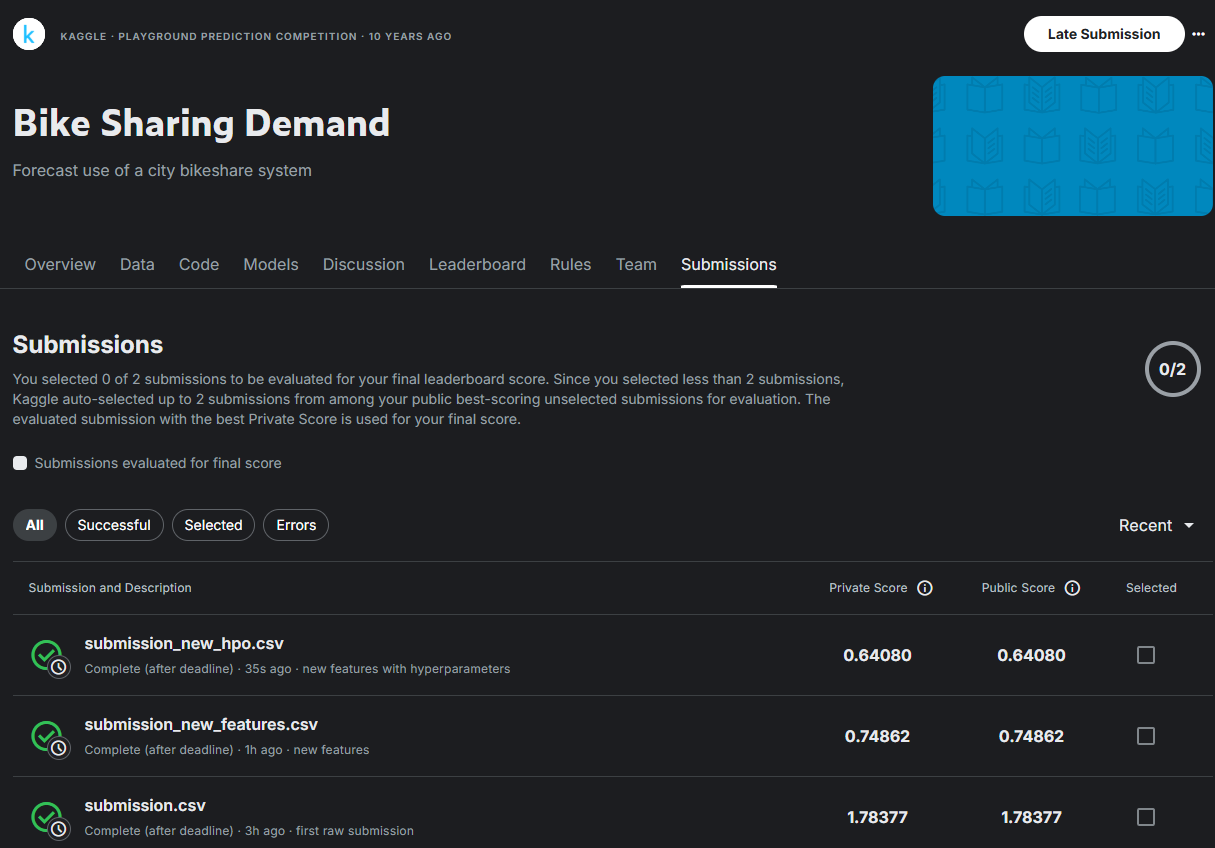

In [215]:
display(Image(filename='./images/submiss-3.png', width=600))

#### New Score of `0.64080` (would be rank 2359/3242 in leaderboard; however, not shown since competition already finished) 

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

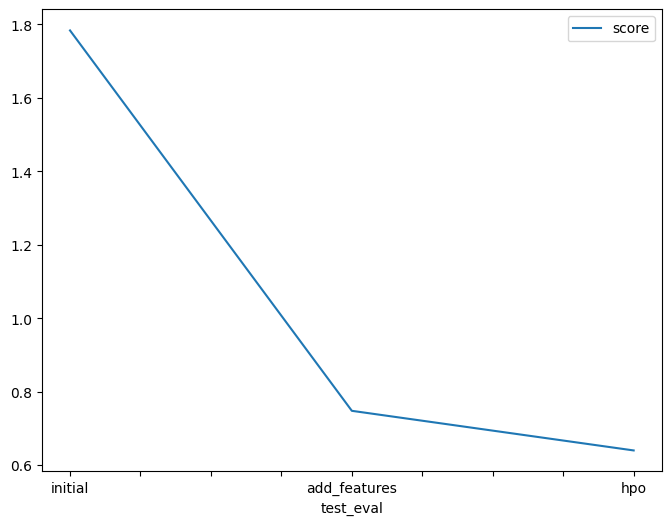

In [254]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78377, 0.74862, 0.64080]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_submiss_kaggle_score.png')

### Hyperparameter table

#### Overview:
Best performing Algorithm was WeightedEnsemble_L3 in all 3 cases:

In [230]:
predictor.leaderboard().loc[0]

model                         WeightedEnsemble_L3
score_val                              -50.729553
eval_metric               root_mean_squared_error
pred_time_val                            4.671595
fit_time                               370.759928
pred_time_val_marginal                        0.0
fit_time_marginal                        0.034802
stack_level                                     3
can_infer                                    True
fit_order                                      25
Name: 0, dtype: object

In [231]:
predictor_new_features.leaderboard().loc[0]

model                         WeightedEnsemble_L3
score_val                              -29.128222
eval_metric               root_mean_squared_error
pred_time_val                             5.12783
fit_time                                369.30654
pred_time_val_marginal                   0.001001
fit_time_marginal                        0.045841
stack_level                                     3
can_infer                                    True
fit_order                                      20
Name: 0, dtype: object

In [232]:
predictor_new_hpo.leaderboard().loc[0]

model                         WeightedEnsemble_L3
score_val                              -30.324222
eval_metric               root_mean_squared_error
pred_time_val                           11.191617
fit_time                               176.057914
pred_time_val_marginal                        0.0
fit_time_marginal                        0.078499
stack_level                                     3
can_infer                                    True
fit_order                                     172
Name: 0, dtype: object

In [251]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1-TimeLimit_sec": [600, 600, 1800],
    "hpo2-FeatureSet": ["Standard", "Weather/Season as Categories + new feature 'Hour'", "Weather/Season as Categories + new feature 'Hour'"],
    "hpo3-HyperparTuning": ["Off", "Off", "Auto"],
    "score": [1.78377, 0.74862, 0.64080]
})

,model,hpo1-TimeLimit_sec,hpo2-FeatureSet,hpo3-HyperparTuning,score
0,initial,600,Standard,Off,1.78377
1,add_features,600,Weather/Season as Categories + new feature 'Hour',Off,0.74862
2,hpo,1800,Weather/Season as Categories + new feature 'Hour',Auto,0.64080


In [243]:
pred1 = predictor.evaluate_predictions(train["count"], predictor.predict(train))
pred1

{'root_mean_squared_error': -100.46041013926637,
 'mean_squared_error': -10092.294005349613,
 'mean_absolute_error': -61.43399658953029,
 'r2': 0.6924047470092773,
 'pearsonr': 0.9271804898185858,
 'median_absolute_error': -30.882415771484375}

In [244]:
pred2 = predictor_new_features.evaluate_predictions(train["count"], predictor_new_features.predict(train))
pred2

{'root_mean_squared_error': -33.320416500100876,
 'mean_squared_error': -1110.2501557401945,
 'mean_absolute_error': -18.195488901900912,
 'r2': 0.9661615490913391,
 'pearsonr': 0.990151803800759,
 'median_absolute_error': -8.547286987304688}

In [245]:
pred3 = predictor_new_hpo.evaluate_predictions(train["count"], predictor_new_hpo.predict(train))
pred3

{'root_mean_squared_error': -14.758055502306728,
 'mean_squared_error': -217.8002022091659,
 'mean_absolute_error': -9.48820085421919,
 'r2': 0.9933618307113647,
 'pearsonr': 0.9972206104433332,
 'median_absolute_error': -5.925909042358398}

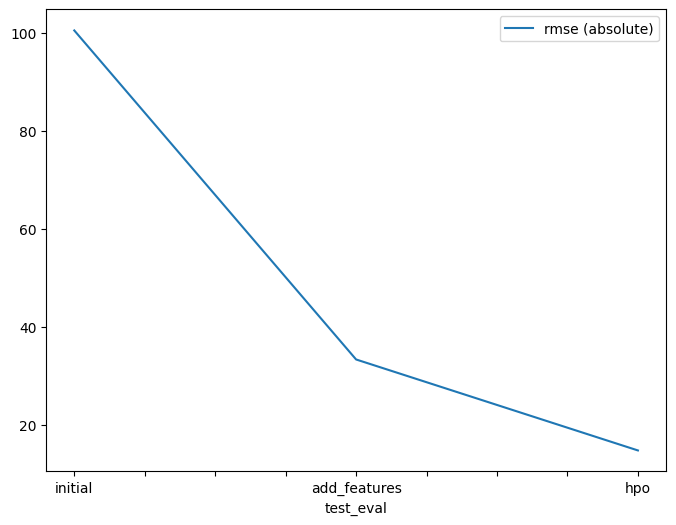

In [253]:
# Plotting the reduction in the absolute RMS errors for the training data:
rmse_initial, rmse_feat, rmse_hpo = pred1['root_mean_squared_error'], pred2['root_mean_squared_error'], pred3['root_mean_squared_error']
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "rmse (absolute)": [abs(rmse_initial), abs(rmse_feat), abs(rmse_hpo)]
    }
).plot(x="test_eval", y="rmse (absolute)", figsize=(8, 6)).get_figure()
fig.savefig('model_train_rmse.png')

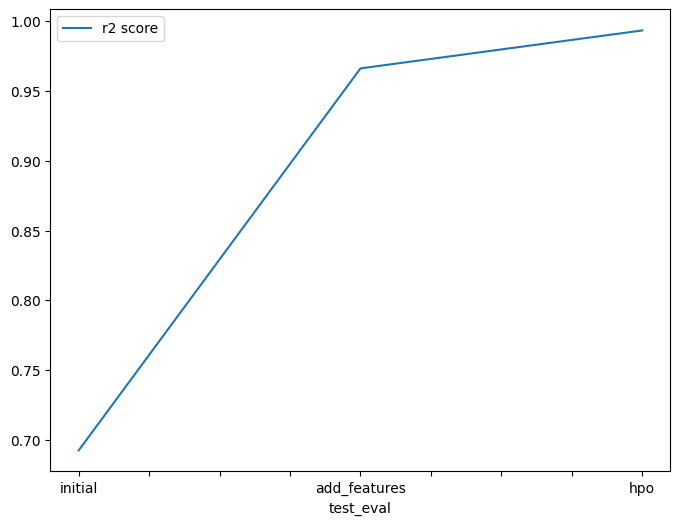

In [250]:
# Plotting the increase in R2 score for the training data:
r2_initial, r2_feat, r2_hpo = pred1['r2'], pred2['r2'], pred3['r2']
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "r2 score": [r2_initial, r2_feat, r2_hpo]
    }
).plot(x="test_eval", y="r2 score", figsize=(8, 6)).get_figure()
fig.savefig('model_rmse.png')

In [252]:
predictions

array([ 24.771128,  42.421867,  46.97394 , ..., 159.17842 , 148.74155 ,
       149.47105 ], dtype=float32)